### <center>  Visualizing Distributions in Finance </center>  

    Analyzing and visualizing distributions is widely used in Data Science projects since we are interested 
    in understanding the behaviour of a numeric variable. In other words, we would want to know the central 
    tendency of a variable as well as the outliers. We would also be interested in knowing if the variable 
    is symmetrically distributed or skewed, if the distribution is unimodal/bimodal/multimodal, if it contains 
    suspicious/impossible values and so on.
    
    Most commonly used plots used for visualizing distributions include:
    
    1. Histogram
    2. Density Plot
    3. Empirical cumulative distribution function
    4. Boxplot
    5. Violin Plot
    6. Strip Chart
    7. Sina Plot
    8. Ridgeline Plot
    9. Quantile–quantile plot

> ##### Data Source

    Since we will be using quandl api and quantmod api to import financial data in this 
    notebook kindly install quandl & quantmod packages before proceeding. Also, register an account on 
    quandl.com and use the secret key.
    
> ##### Creating a free Quandl account and using your API key  

    For more information, refer to :
    https://www.quandl.com/tools/r
    

In [1]:
# Run the script below with your secret key obtained after registering on quandl
# quandl_sk = "<quandl secret key>"

# Alternative way to Load Data Tokens 
source("../Jupyter Notebooks - R/Setup/apitokens.r")

In [2]:
# Data manipulation libraries used in this notebook
library(tibble) # includes rownames_to_column function
library(dplyr) # includes filter function
library(tidyr) # includes spread function

# Visualization libraries used in this notebook
library(ggplot2) # Includes ggplot function
library(ggforce) # Includes geom_sina & geom_parallel_sets
library(ggridges) # Includes geom_
library(cowplot) # Includes axis_canvas for generating A Canvas Onto Which One Can Draw Axis-Like Objects

# Data API libraries
library(Quandl) # To import data from Quandl API
library(quantmod) # To import data using yahoo,google api

# Animation Packages
library(gganimate) # to add animation to static plot 
library(gifski) # Converts images to GIF animations
library(png) # Provides an easy and simple way to read, write and display bitmap images stored in the PNG format.

# Datetime Parsing functions
library(lubridate) # includes datetime parsing functions

# Data visualization addon library for Themes and colors available in my github repository
# https://github.com/prabhupavitra/dviz.addon
library(dviz.addon)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See

In [3]:
# Resizing plot width and height from default 7
# https://www.rdocumentation.org/packages/repr/versions/0.7/topics/repr-options
options(repr.plot.width=10, repr.plot.height=4)

> ### Importing Data (Using Quandl and quantmod API)


    This notebook uses Quandl and quantmod API to import Financial Data directly to R.
    Datasets used in this notebook include:

    1. Historical Prices of Precious Metals 
    (Gold, Silver, Platinum and Palladium)
    2. Historical Prices of Base Metals 
    (Aluminum; Cobalt; Copper; Iron Ore; Lead; Molybdenum; Nickel; Tin; Uranium and Zinc)
    3. Consumer Price Index for All Urban Consumers (CPI-U)


> ##### Precious Metals Prices : London Fixing (U.S. Dollars per Troy Ounce)

In [4]:
# Using Quandl API : Import prices of Precious Metals ( Gold, Silver, Platinum, Palladium )

# Gold Price: London Fixing
gold <- Quandl("LBMA/GOLD", api_key=quandl_sk)

# Silver Price: London Fixing
silver <- Quandl("LBMA/SILVER", api_key=quandl_sk)

# Platinum Fixing
platinum <- Quandl("LPPM/PLAT", api_key=quandl_sk)

# Palladium
palladium <- Quandl("LPPM/PALL", api_key=quandl_sk)

> ##### Base Metals Prices : Spot Prices (U.S. Dollars per metric ton)

In [5]:
# Other Base Metals (Aluminum; Cobalt; Copper; Iron Ore; Lead; Molybdenum; Nickel; Tin; Uranium and Zinc)

# Aluminum; 99.5% minimum purity; LME spot price; CIF UK ports; US$ per metric ton
aluminium <- Quandl("ODA/PALUM_USD", api_key=quandl_sk)

# Copper; grade A cathode; LME spot price; CIF European ports; US$ per metric ton
copper <- Quandl("ODA/PCOPP_USD", api_key=quandl_sk)

# China import Iron Ore Fines 62% FE spot (CFR Tianjin port); US dollars per metric ton
ironore <- Quandl("ODA/PIORECR_USD", api_key=quandl_sk)

# Lead; 99.97% pure; LME spot price; CIF European Ports; US$ per metric ton
lead <- Quandl("ODA/PLEAD_USD", api_key=quandl_sk)

# Nickel; melting grade; LME spot price; CIF European ports; US$ per metric ton
nickel <- Quandl("ODA/PNICK_USD", api_key=quandl_sk)

# Tin; standard grade; LME spot price; US$ per metric ton
tin <- Quandl("ODA/PTIN_USD", api_key=quandl_sk)

# Zinc; high grade 98% pure; US$ per metric ton
zinc <- Quandl("ODA/PZINC_USD", api_key=quandl_sk)

# Not in metric ton

# Cobalt; U.S. cathodes; spot
cobalt <- Quandl("ODA/PCOBA_USD", api_key=quandl_sk) 

# Uranium; NUEXCO; Restricted Price; Nuexco exchange spot; US$ per pound
uranium <- Quandl("ODA/PURAN_USD", api_key=quandl_sk)

# Molybdenum; 57 to 63% purity contained in roasted molybdenum concentrate; LME spot price; USD/ton
molybdenum <- Quandl("ODA/PLMMODY_USD", api_key=quandl_sk)

> ##### CPI Data : CPI for U.S. City Average

    Units:
    Index 1982-1984=100,
    Seasonally Adjusted
    
    Frequency:
    Monthly

In [6]:
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average 
monthly_allitems <- Quandl("FRED/CPIAUCSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Food and Beverages in U.S. City Average
monthly_foodbev <- Quandl("FRED/CPIFABSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average
monthly_excfoodnbev <- Quandl("FRED/CPILFESL", api_key=quandl_sk)  

# Consumer Price Index for All Urban Consumers: Recreation in U.S. City Average
monthly_recreation <- Quandl("FRED/CPIRECNS", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Housing in U.S. City Average 
monthly_housing <- Quandl("FRED/CPIHOSNS", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Education and Communication in U.S. City Average
monthly_eduncomm <- Quandl("FRED/CPIEDUSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Apparel in U.S. City Average
monthly_apparel <- Quandl("FRED/CPIAPPSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Energy in U.S. City Average
monthly_energy <- Quandl("FRED/CPIENGSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Other Goods and Services in U.S. City Average
monthly_othergns <- Quandl("FRED/CPIOGSSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Transportation in U.S. City Average 
monthly_trnsprt <- Quandl("FRED/CPITRNSL", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Services in U.S. City Average 
monthly_otherserv <- Quandl("FRED/CUSR0000SAS", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Commodities in U.S. City Average
monthly_commod <- Quandl("FRED/CUSR0000SAC", api_key=quandl_sk) 

# Consumer Price Index for All Urban Consumers: Medical Care in U.S. City Average
monthly_medcare <- Quandl("FRED/CPIMEDSL", api_key=quandl_sk) 

> ##### CPI Data : CPI Special Indices

    Units:
    Index 1982-1984=100,
    Not Seasonally Adjusted
    
    Frequency:
    Semi-annual

> ##### Bitcoin Data from Yahoo : Using Quantmod Package

In [7]:
cryptodata <- new.env() #Make a new environment for quantmod to store data in
 
beginDate = as.Date("2014-04-01") #Specify period of time we are interested in
endDate = as.Date("2019-12-01")
 
ticker <- c("BTC-USD","IBM") #Define the tickers we are interested in
 
#Download the stock historical data (for all tickers mentioned previously)
getSymbols(ticker, env = cryptodata, src = "yahoo", from = beginDate, to = endDate,auto.assign=TRUE)

btcusd <- data.frame(get("BTC-USD", envir = cryptodata))
ibmstock <- data.frame(get("IBM", envir = cryptodata))

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "BTC-USD" "IBM"

> ### Data Manipulation
> ##### Precious Metals Prices : London Fixing (U.S. Dollars per Troy Ounce)

In [8]:
# Merging the datasets of all 4 precious metals (Measured per Troy Ounce)
precious_metals <- 
rbind(gold %>% select("Date","USD (AM)") %>% rename(USD="USD (AM)") %>% mutate(Commodity="Gold"),
silver %>% select("Date","USD") %>% mutate(Commodity="Silver"),
platinum %>% select("Date","USD AM") %>% rename(USD="USD AM") %>% mutate(Commodity="Platinum"),
palladium %>% select("Date","USD AM") %>% rename(USD="USD AM") %>% mutate(Commodity="Palladium")) %>%
mutate(Year = year(Date)) %>% filter(USD!="NA")

head(precious_metals,5)

Date,USD,Commodity,Year
2020-06-09,1707.50,Gold,2020
2020-06-08,1692.00,Gold,2020
2020-06-05,1709.55,Gold,2020
2020-06-04,1706.45,Gold,2020
2020-06-03,1717.60,Gold,2020


> ##### Base Metals Prices : Spot Prices (U.S. Dollars per metric ton)

In [9]:
base_metals <-
rbind(aluminium %>% mutate(Commodity="Aluminium"),
      copper %>% mutate(Commodity="Copper"),
      ironore %>% mutate(Commodity="Iron Ore"),
      lead %>% mutate(Commodity="Lead"),
      nickel %>% mutate(Commodity="Nickel"),
      tin %>% mutate(Commodity="Tin"),
      zinc %>% mutate(Commodity="Zinc")) %>%
mutate(Year = year(Date))

head(base_metals,1)

Date,Value,Commodity,Year
2020-05-31,1466.372,Aluminium,2020


> ##### CPI Data : CPI for U.S. City Average

In [10]:
cpi_monthly_sa <-
rbind(monthly_allitems %>% mutate(Category="CPI"),
      monthly_excfoodnbev %>% mutate(Category="Core CPI"),
      monthly_apparel %>% mutate(Category="Apparel"),
      monthly_commod %>% mutate(Category="Commodities"),
      monthly_eduncomm %>% mutate(Category="Education & Communication"),
      monthly_energy %>% mutate(Category="Energy"),
      monthly_foodbev %>% mutate(Category="Food & Beverages"),
      monthly_housing %>% mutate(Category="Housing"),
      monthly_medcare %>% mutate(Category="Medical Care"),
      monthly_othergns %>% mutate(Category="Other Goods & Services"),
      monthly_otherserv %>% mutate(Category="Other Services"),
      monthly_recreation %>% mutate(Category="Recreation"),
      monthly_trnsprt %>% mutate(Category="Transportation")) %>%
mutate (Year =year(Date),Month=month(Date))

head(cpi_monthly_sa,1)

Date,Value,Category,Year,Month
2020-04-01,255.902,CPI,2020,4


> ##### Some basic Math Calculations with CPI

In [11]:
# Percent Change (1982-Present)
cpi_pctchng <- filter(cpi_monthly_sa,#Month==1,
                                     Year>1982,
                                     !(Category %in% c('Energy','Transport'))) %>%
               group_by(Category) %>%
               arrange(Date) %>%
               mutate(PercentChange = (Value/lag(Value)-1)*100) %>%
               filter(PercentChange!="NA") 

# Over-the-year percent change 
cpi_otypct <- 
cpi_monthly_sa %>% 
filter(Year>1982,Month==12) %>% 
arrange(Date) %>% 
group_by(Category) %>% 
mutate(OverYrPercentChange = (Value/lag(Value)-1)*100) %>%
filter(OverYrPercentChange!="NA")


# Annual Average, Annual Average CHange and Purchasing Power
cpi_annualavg <-
cpi_monthly_sa %>% filter(Year>1982,Year<2020) %>%
arrange(Date) %>%
group_by(Year,Category) %>%
summarise(AnnualAvg = mean(Value)) %>%
group_by(Category) %>%
mutate(AnnualAvgChange = (AnnualAvg/lag(AnnualAvg)-1)*100,PurchasingPower = (AnnualAvg/lag(AnnualAvg)*100)) %>%
filter(AnnualAvgChange!="NA")

> ##### Calculating Return on Bitcoin Data from Yahoo

In [12]:
btcusd_return <-
btcusd %>% rename("Adjusted_Close" = "BTC.USD.Adjusted",
                  "Trading_Volume" = "BTC.USD.Volume",
                  "High" = "BTC.USD.High",
                  "Open" = "BTC.USD.Open",
                  "Low" = "BTC.USD.Low",
                  "Close" = "BTC.USD.Close") %>%
rownames_to_column("Date") %>% 
mutate(Return = (Adjusted_Close/lag(Adjusted_Close)-1)*100,
       Trading_Volume_millions = Trading_Volume/(10^6)) %>% filter(Return!="NA")

head(btcusd_return,1)

Date,Open,High,Low,Close,Trading_Volume,Adjusted_Close,Return,Trading_Volume_millions
2014-09-18,456.86,456.86,413.104,424.44,34483200,424.44,-7.192558,34.4832


In [13]:
btcusd_monthlyret <- btcusd_return %>% 
                     mutate(Month = as.yearmon(Date)) %>% 
                     arrange(Month) %>%
                     group_by(Month) %>% 
                     summarise(MonthlyReturn = mean(Return)) 

head(btcusd_monthlyret,5)

Month,MonthlyReturn
Sep 2014,-1.1880465
Oct 2014,-0.3808112
Nov 2014,0.4413762
Dec 2014,-0.5086929
Jan 2015,-0.9666813


> ##### Calculating Return on IBM Stock from Yahoo

In [14]:
ibmstock_return <- ibmstock %>% 
                   rename("Adjusted_Close"="IBM.Adjusted") %>%
                   mutate(Return=(Adjusted_Close/lag(Adjusted_Close)-1)*100) %>%
                   filter(Return!="NA")

head(ibmstock_return,1)

IBM.Open,IBM.High,IBM.Low,IBM.Close,IBM.Volume,Adjusted_Close,Return
194.24,194.5,192.49,193.55,4924100,149.5165,-0.4884525


> ### Visualizing distributions

    
> #### Single Distribution

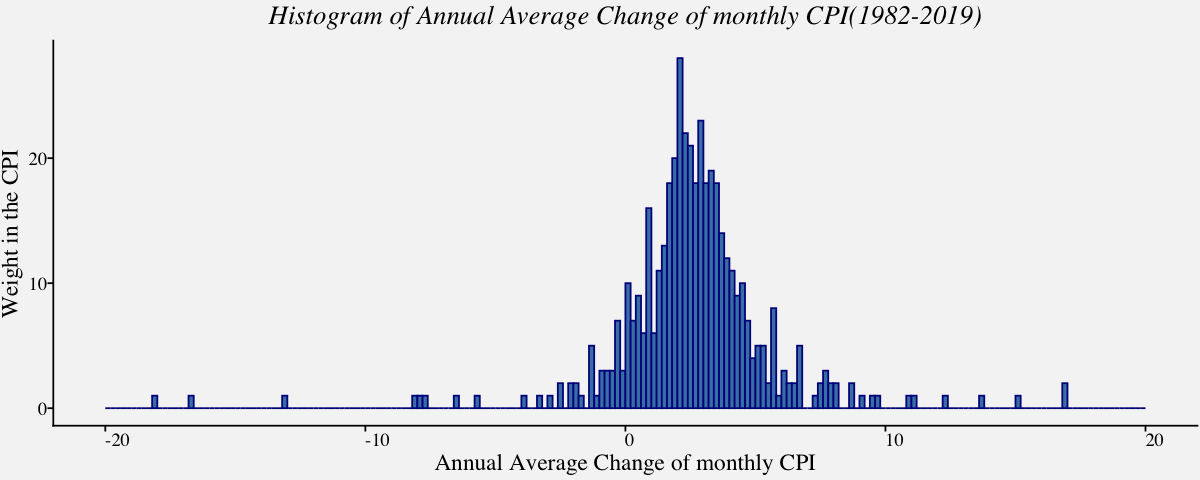

In [15]:
# Histogram using geom_histogram() of Annual average change of monthly CPI
cpi_histplot <-
ggplot(cpi_annualavg, aes(x = cpi_annualavg$AnnualAvgChange)) + 
  geom_histogram(breaks=seq(-20,20,by=0.2),
                 col="darkblue",
                 fill="steelblue")  + 
  labs(x="Annual Average Change of monthly CPI",y="Weight in the CPI") +
  ggtitle("Histogram of Annual Average Change of monthly CPI(1982-2019)") +
  theme_pprabhu() +
  theme(plot.title = element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))    

cpi_histplot

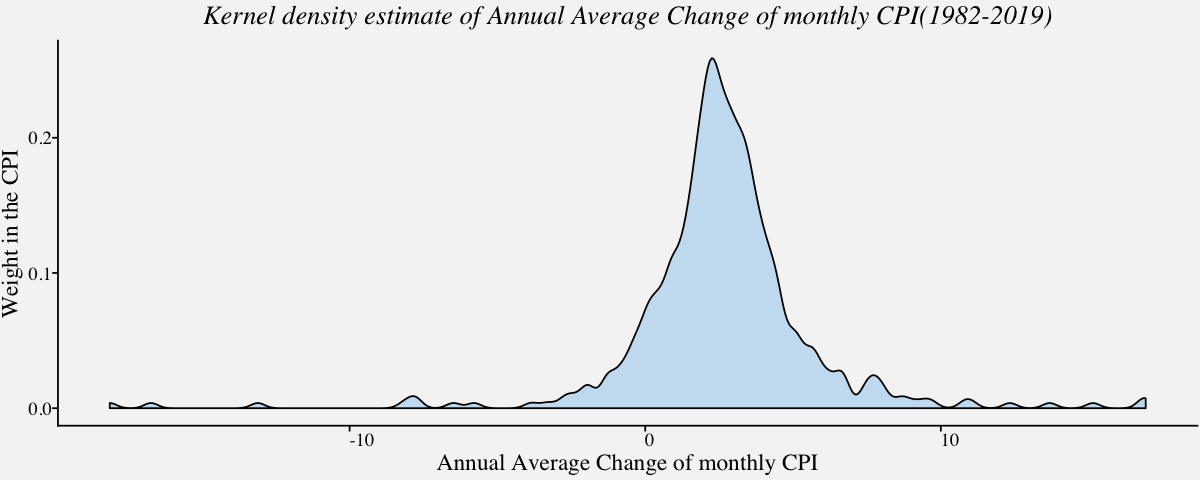

In [17]:
# Kernel density estimaction using geom_density()
cpi_kerneldensity <-
  ggplot(cpi_annualavg, aes(x = cpi_annualavg$AnnualAvgChange)) + 
  geom_density(fill="#56B4E950",alpha=0.3,adjust=1/2) +
  labs(x="Annual Average Change of monthly CPI",y="Weight in the CPI") +
  ggtitle("Kernel density estimate of Annual Average Change of monthly CPI(1982-2019)") +
  theme_pprabhu() +
  theme(plot.title = element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))  

cpi_kerneldensity

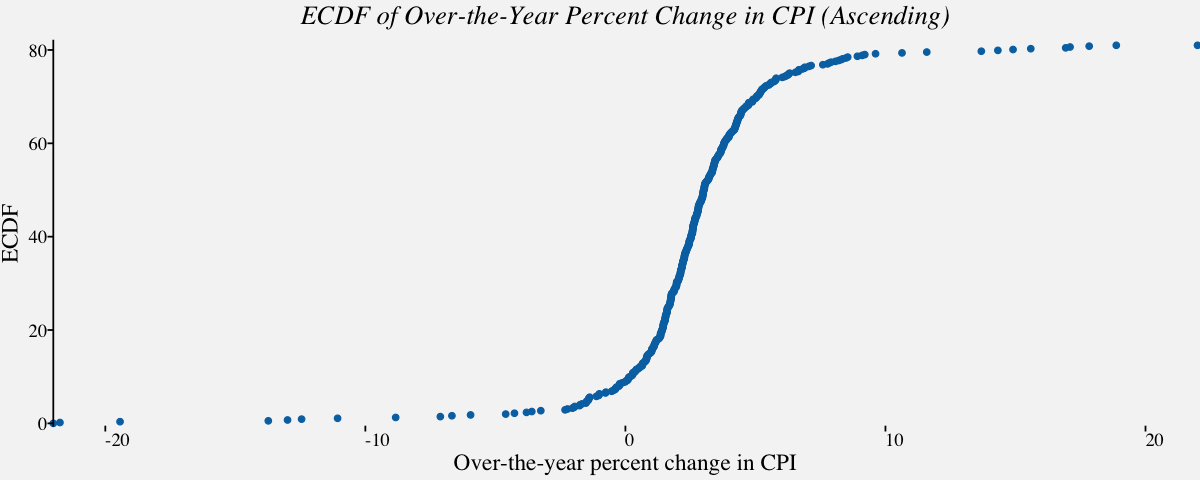

In [18]:
# Empirical cumulative distribution function in ascending order for December Over-the-year percent change in CPI
# ecdf using stat_ecdf() ; geom = "step" can be used for a step ecdf
cpi_ecdf_plot <-
ggplot(cpi_otypct, aes(x = cpi_otypct$OverYrPercentChange, 
                     y =81*..y..)) + 
  stat_ecdf(geom = "point", color = "#0072B2") +
  scale_x_continuous(limits = c(-22, 22), 
                     expand = c(0, 0),
                     name="Over-the-year percent change in CPI") +
  scale_y_continuous(limits = c(-.5, 82), 
                     expand = c(0, 0), 
                     name = "ECDF") +
  coord_cartesian(clip = "off") +
  theme_pprabhu() +
  ggtitle("ECDF of Over-the-Year Percent Change in CPI (Ascending)") +
  theme(axis.line.x = element_blank(),
        plot.title=element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))

cpi_ecdf_plot

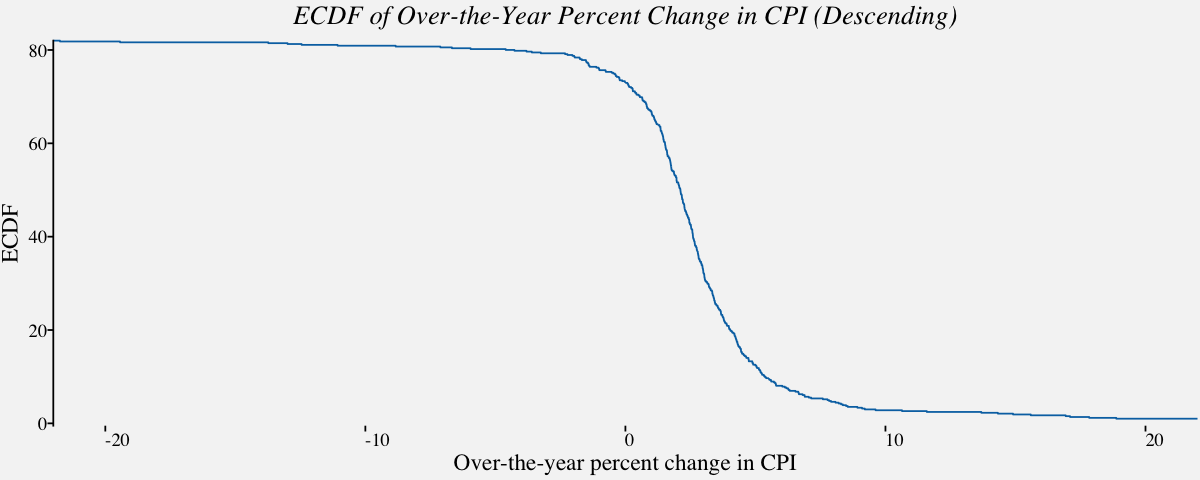

In [21]:
# Empirical cumulative distribution function in descending order
ggplot(cpi_otypct, aes(x = cpi_otypct$OverYrPercentChange,  
                         y = 82-81*..y..)) + 
  stat_ecdf(geom = "step", color = "#0072B2") +
  scale_x_continuous(limits = c(-22, 22), 
                     expand = c(0, 0),
                     name="Over-the-year percent change in CPI") +
  scale_y_continuous(limits = c(-.5, 82), 
                     expand = c(0, 0), 
                     name = "ECDF") +
  coord_cartesian(clip = "off") +
  theme_pprabhu() +
  ggtitle("ECDF of Over-the-Year Percent Change in CPI (Descending)") +
  theme(axis.line.x = element_blank(),
        plot.title=element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))

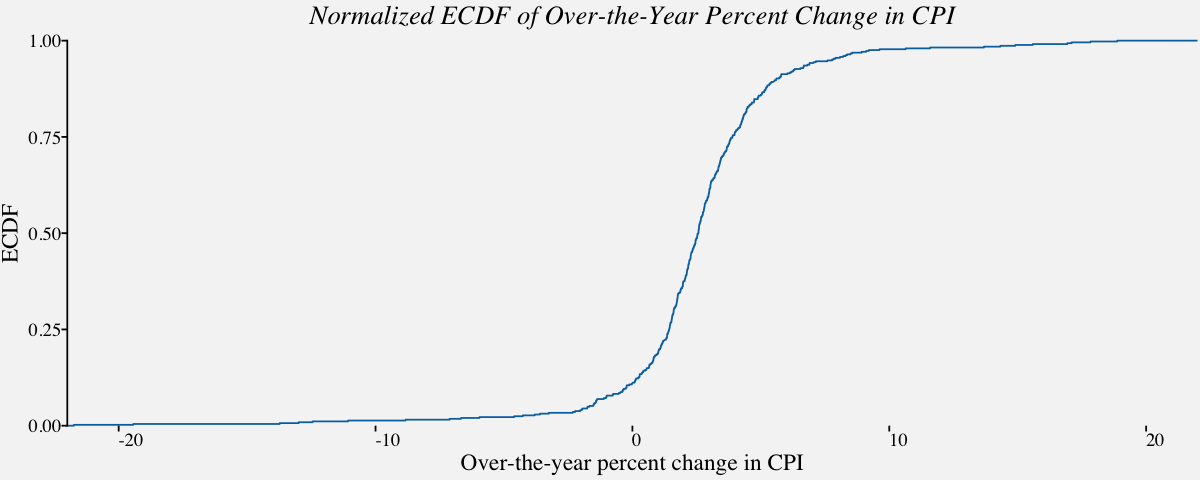

In [19]:
# Normalized ecdf 
ggplot(cpi_otypct, aes(x = cpi_otypct$OverYrPercentChange,  
                         y =..y..)) + 
  stat_ecdf(geom = "step", color = "#0072B2") +
  scale_x_continuous(limits = c(-22, 22), 
                     expand = c(0, 0),
                     name="Over-the-year percent change in CPI") +
  scale_y_continuous(limits = c(0, 1), 
                     expand = c(0, 0), 
                     name = "ECDF") +
  coord_cartesian(clip = "off") +
  theme_pprabhu() +
  ggtitle("Normalized ECDF of Over-the-Year Percent Change in CPI") +
  theme(axis.line.x = element_blank(),
        plot.title=element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))

> ### Visualizing Multiple Distributions

    Density plots work well for multiple distributions as they are somewhat distinct and contiguous 
    For instance, we can visualize the distribution of vehicle models over the yearsbased on the type of 
    drivetrain.
    
        1. Kernel Density 
        2. Empirical cumulative distribution functions


> #####  Kernel density estimation for multiple distributions 

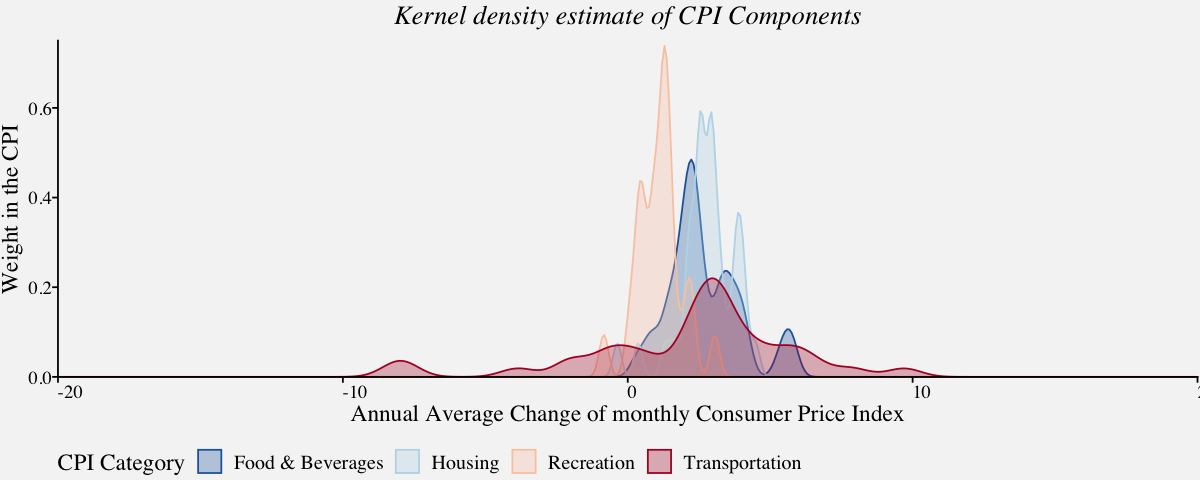

In [20]:
# Plots the Kernel density estimation for multiple distributions distinct and contiguous
cpi_annualavg_kde <- filter(cpi_annualavg,Category %in% c('Housing',
                                                          'Transportation',
                                                          'Recreation',
                                                          'Food & Beverages'))

cpi_annualavg_kdeplot <-
ggplot(cpi_annualavg_kde,
       aes(x = cpi_annualavg_kde$AnnualAvgChange,
           color=cpi_annualavg_kde$Category,
           fill=cpi_annualavg_kde$Category)) + 
  geom_density(alpha=0.3,adjust=1/2) +  
  labs(fill="CPI Category",color="CPI Category") +
  scale_x_continuous(limits = c(-20, 20), name = "Annual Average Change of monthly Consumer Price Index", expand = c(0, 0)) +
  scale_y_continuous(limits = c(0,0.75), name = "Weight in the CPI", expand = c(0, 0)) +
  coord_cartesian(clip = "off") +
  ggtitle("Kernel density estimate of CPI Components") +
  theme_pprabhu() +
  scale_fill_manual(values=pprabhu_pal("div",reverse=TRUE)(4)) +
  scale_color_manual(values=pprabhu_pal("div",reverse=TRUE)(4)) +
  theme(plot.title = element_text(hjust = 0.5,face="italic"),
        legend.position = "bottom",
        axis.text.x = element_text(angle=0)) 

cpi_annualavg_kdeplot

> ##### Empirical cumulative distribution for multiple distributions `

    Examples : VAR

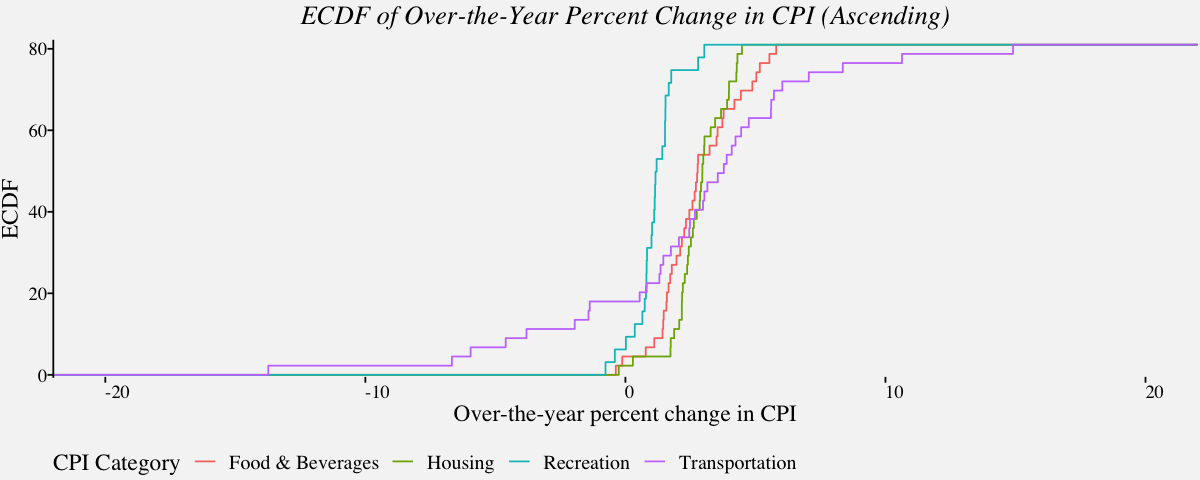

In [21]:
# Empirical cumulative distribution function in ascending order 
# For December Over-the-year percent change in CPI (Categories : Housing, Food, Recreation and Transportation)
cpi_fstc <- filter(cpi_otypct,Category %in% c('Housing',
                                              'Transportation',
                                              'Recreation',
                                              'Food & Beverages'))

cpi_multecdf_plot <-
ggplot(cpi_fstc, aes(x = cpi_fstc$OverYrPercentChange, 
                     y =81*..y..,
                     color =cpi_fstc$Category)) + 
  stat_ecdf(geom = "step") +
  labs(color="CPI Category") +
  scale_x_continuous(limits = c(-22, 22), 
                     expand = c(0, 0),
                     name="Over-the-year percent change in CPI") +
  scale_y_continuous(limits = c(-.5, 82), 
                     expand = c(0, 0), 
                     name = "ECDF") +
  coord_cartesian(clip = "off") +
  theme_pprabhu() +
  ggtitle("ECDF of Over-the-Year Percent Change in CPI (Ascending)") +
  theme(axis.line.x = element_blank(),
        plot.title=element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))

cpi_multecdf_plot

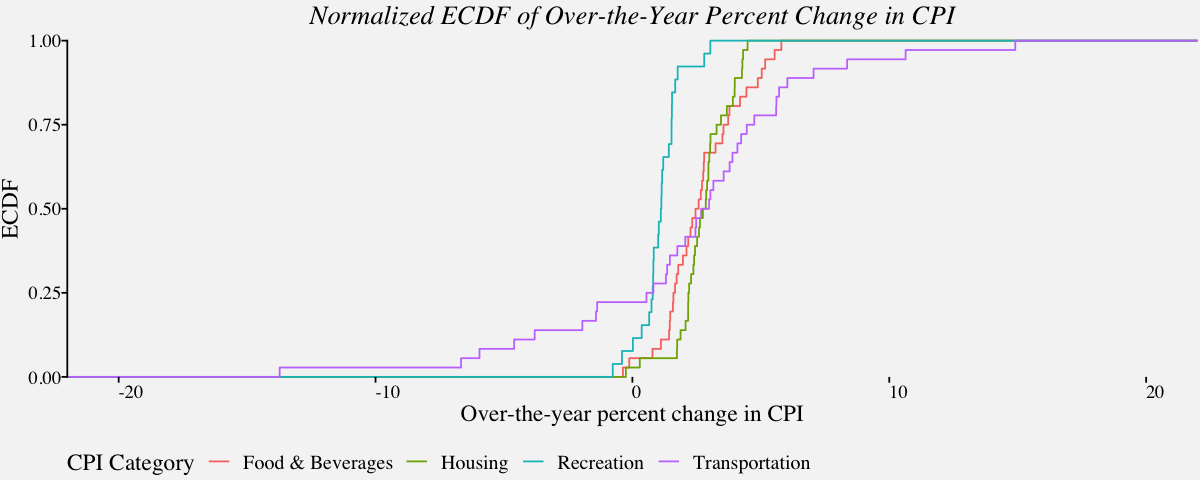

In [22]:
# Normalized ecdf for Multiple distributions
ggplot(cpi_fstc, aes(x = cpi_fstc$OverYrPercentChange,  
                       y =..y..,
                       color=cpi_fstc$Category)) + 
  stat_ecdf(geom = "step") +
  labs(color="CPI Category") +
  scale_x_continuous(limits = c(-22, 22), 
                     expand = c(0, 0),
                     name="Over-the-year percent change in CPI") +
  scale_y_continuous(limits = c(0, 1), 
                     expand = c(0, 0), 
                     name = "ECDF") +
  coord_cartesian(clip = "off") +
  theme_pprabhu() +
  ggtitle("Normalized ECDF of Over-the-Year Percent Change in CPI") +
  theme(axis.line.x = element_blank(),
        plot.title=element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))

> ### Visualizing Highly Skewed Distributions

In [23]:
ibmstock_temp <-
ibmstock %>% 
rownames_to_column("Date") %>% 
filter(year(Date)>2017)

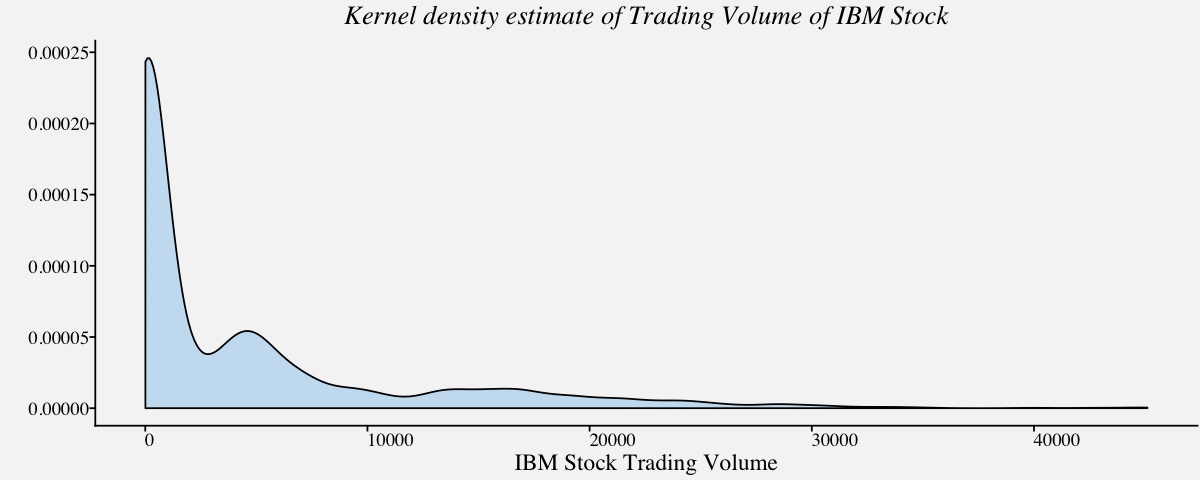

In [24]:

# Density plot of a Highly skewed distribution : Trading Volume of IBM Stock
ggplot(btcusd_return, aes(x = btcusd_return$Trading_Volume_millions)) + 
  geom_density(fill="#56B4E950",alpha=0.3,adjust=1) +
  labs(x="IBM Stock Trading Volume",y="") +
  theme_pprabhu() +
  ggtitle("Kernel density estimate of Trading Volume of IBM Stock") +
  theme(plot.title = element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))  

Warning message:
“Removed 777 rows containing non-finite values (stat_ecdf).”

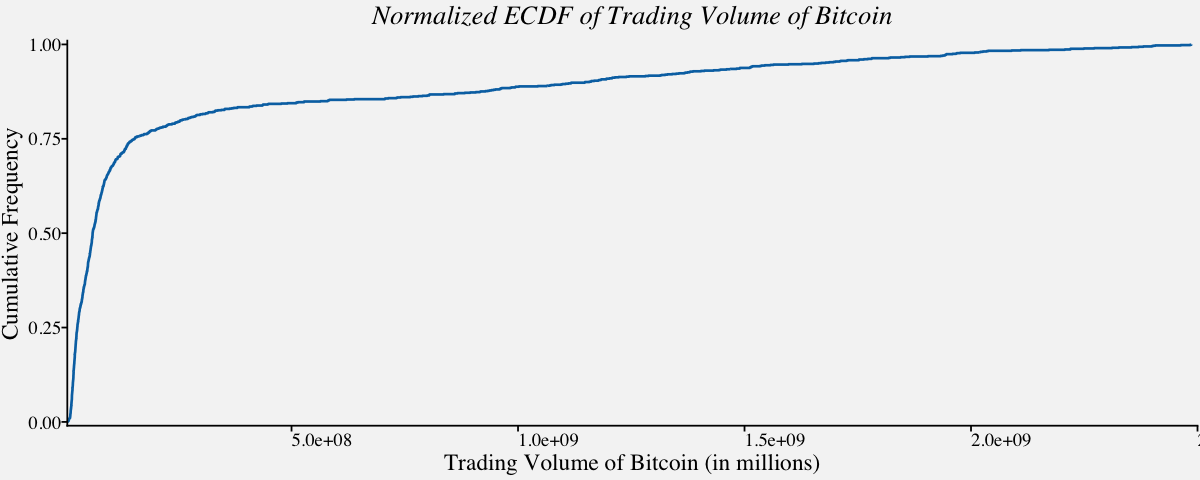

In [25]:
# Normalized ECDF of a Highly skewed distribution : Trading Volume of Bitcoin
ggplot(btcusd_return, aes(x = btcusd_return$Trading_Volume, y =..y..)) + 
  stat_ecdf(geom = "step", 
            color = "#0072B2", 
            size = 0.75, 
            pad = FALSE) +
  theme_minimal() + 
  scale_x_continuous(limits = c(0.5e+07, 2.5e+09), 
                     expand = c(0, 0),
                     name="Trading Volume of Bitcoin (in millions)") +
  scale_y_continuous(limits = c(-.01, 1.01), 
                     expand = c(0, 0), 
                     name = "Cumulative Frequency") +
  coord_cartesian(clip = "off") +
  theme_pprabhu() +
  ggtitle("Normalized ECDF of Trading Volume of Bitcoin") +
  theme(plot.title=element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))


> #### Using Log Transformation 

    The log transformation, a widely used method to address skewed data, is one of the most popular 
    transformations used to reduce right skewness.

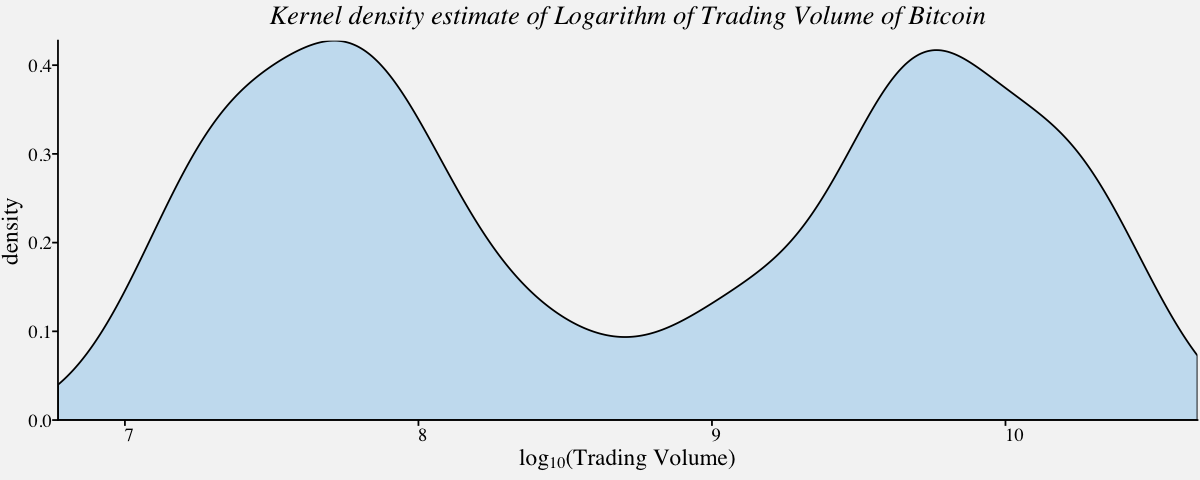

In [26]:
# Density plot of logarithm of a Highly skewed distribution : Trading Volume of Bitcoin
ggplot(btcusd_return, aes(x = log10(btcusd_return$Trading_Volume))) + 
  geom_density(fill="#56B4E950",alpha=0.3) +
  scale_x_continuous(
    expand = c(0, 0),
    name = expression(paste("log"["10"], "(Trading Volume)"))) +
  scale_y_continuous(expand = c(0, 0), name = "density") +
  theme_pprabhu() +
  ggtitle("Kernel density estimate of Logarithm of Trading Volume of Bitcoin") +
  theme(plot.title = element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))  

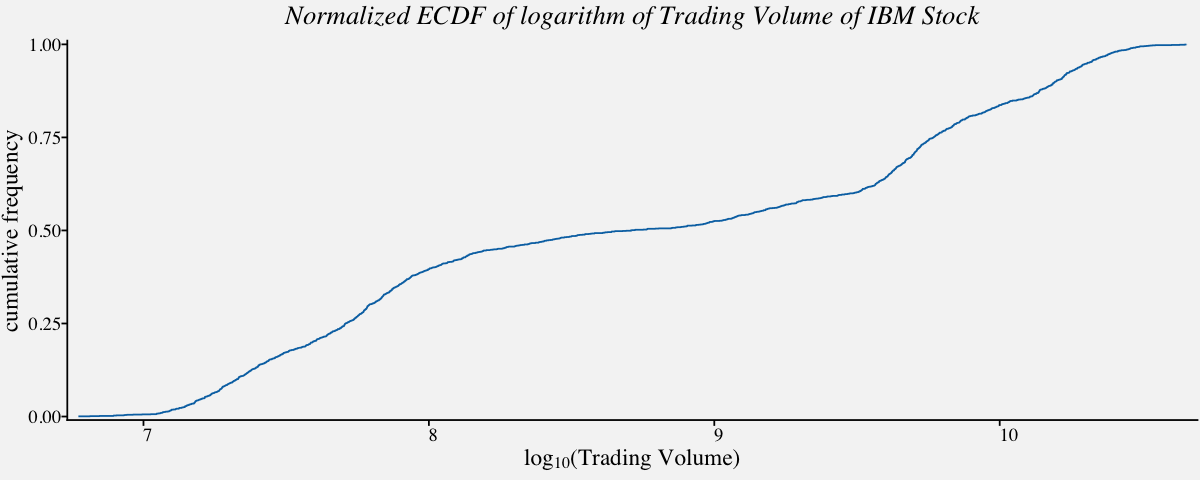

In [27]:
# ECDF of logarithm of a right skewed distribution : Trading Volume of IBM Stock 
ggplot(btcusd_return, aes(x = log10(btcusd_return$Trading_Volume))) + 
  stat_ecdf(geom = "step", 
            color = "#0072B2", 
            pad = FALSE) +
  scale_x_continuous(
    expand = c(0.01, 0),
    name = expression(paste("log"["10"], "(Trading Volume)"))) +
  scale_y_continuous(expand = c(0.01, 0), name = "cumulative frequency") +
  coord_cartesian(clip = "off") +
  theme_pprabhu() +
  ggtitle("Normalized ECDF of logarithm of Trading Volume of IBM Stock") +
  theme(plot.title=element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))

> ##### To test whether a distribution follows Power Law (Using descending log-log ecdf plot)

    To see that this distribution is not a power law, we plot two quantities against each other with logarithmic 
    axes and they show do not show a linear relationship. This indicates that the two quantities do not have a 
    power law distribution. On the contrary, if the descending ecdf with logarithmic axes shows perfect 
    linerarity, we would conclude that the variables follow power law distribution.

Warning message:
“Transformation introduced infinite values in continuous y-axis”

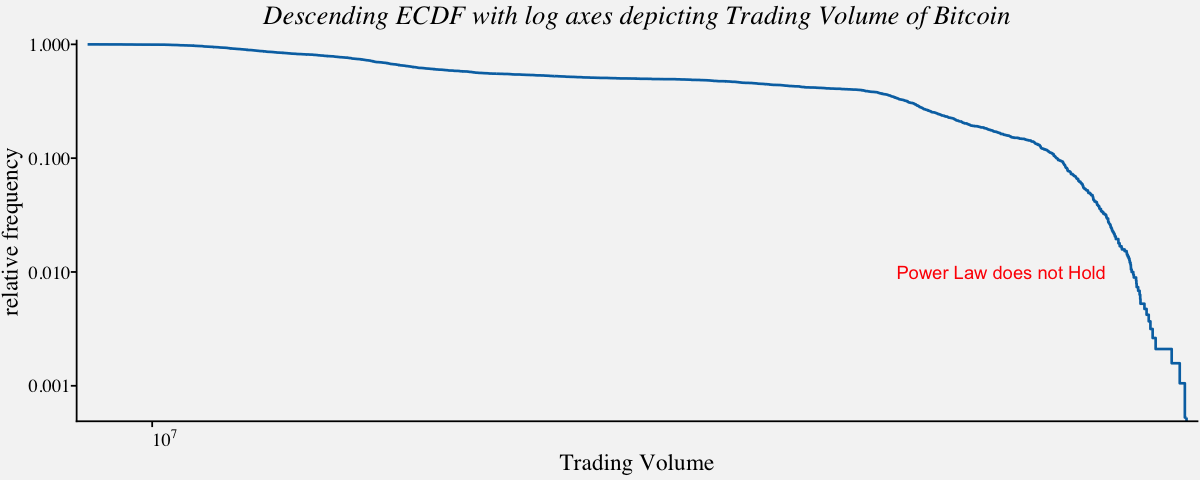

In [28]:
# Descending ecdf with logarithmic x and y axes ; 
ggplot(btcusd_return, aes(x=btcusd_return$Trading_Volume, y = 1-..y..)) + 
  stat_ecdf(geom = "step", 
            color = "#0072B2", 
            size = 0.75, 
            pad = FALSE) +
  scale_x_log10(expand = c(0.01, 0),
                breaks = c(1e2, 1e3, 1e4, 1e5, 1e6, 1e7),
                labels = c(expression(10^2), expression(10^3), expression(10^4),
                           expression(10^5), expression(10^6), expression(10^7)),
                name = "Trading Volume") +
  scale_y_log10(expand = c(0.01, 0), breaks = c(1e-3, 1e-2, 1e-1, 1), name = "relative frequency") +
  theme_pprabhu() +
  annotate("text", x = 10^10, y = 0.01, label = "Power Law does not Hold",color="red") +
  ggtitle("Descending ECDF with log axes depicting Trading Volume of Bitcoin") +
  theme(plot.title=element_text(hjust = 0.5,face="italic"),
        axis.text.x = element_text(angle=0))

# When Power law holds, the plot will look like like a straight line

Warning message:
“Removed 55 rows containing non-finite values (stat_density).”Warning message:
“Transformation introduced infinite values in continuous y-axis”

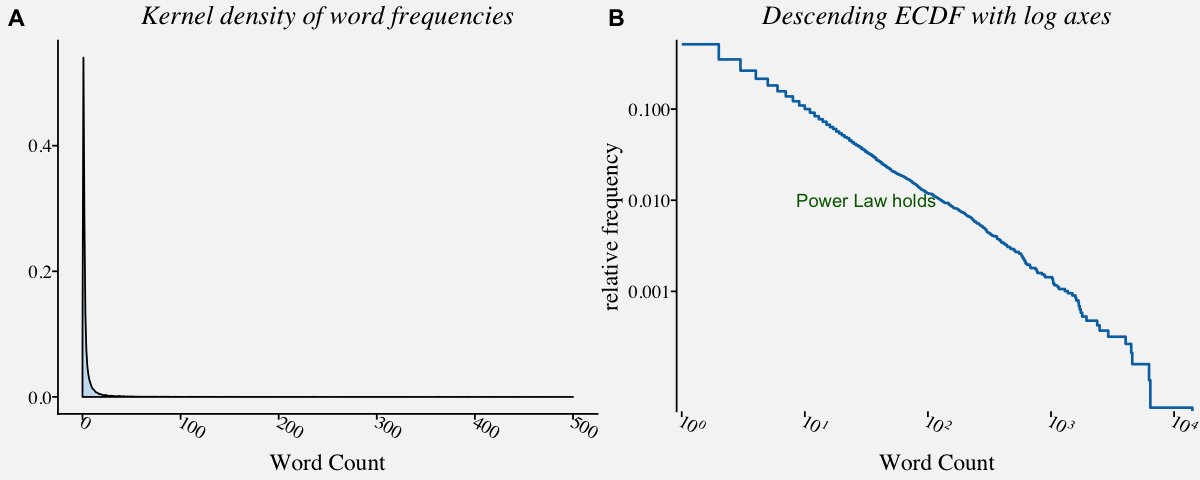

In [29]:
library("poweRlaw")

# The Moby Dick data set contains the frequency of unique words in the novel Moby Dick by Herman Melville.
data("moby", package="poweRlaw")
moby_df <- data.frame(moby)

# Density plot of a Highly skewed distribution : Trading Volume of IBM Stock
moby_kde <-
ggplot(moby_df, aes(x = moby)) + 
  geom_density(fill="#56B4E950",alpha=0.3,adjust=1) +
  theme_minimal() +
  xlim(0,500) +
  theme_pprabhu() +
  labs(x="Word Count",y="") +
  ggtitle("Kernel density of word frequencies") +
  theme(plot.title = element_text(hjust = 0.5,face="italic"))  

# Descending ecdf with logarithmic x and y axes ; When Power law holds, the plot will look like like a straight line
moby_powerlaw <-
ggplot(moby_df, aes(x=moby, y = 1-..y..)) + 
  stat_ecdf(geom = "step", 
            color = "#0072B2", 
            size = 0.75, 
            pad = FALSE) +
  scale_x_log10(expand = c(0.01, 0),
                breaks = c(1e0, 1e1, 1e2, 1e3, 1e4),
                labels = c(expression(10^0), expression(10^1), expression(10^2),
                           expression(10^3), expression(10^4)),
                name = "Word Count") +
  scale_y_log10(expand = c(0.01, 0), breaks = c(1e-3, 1e-2, 1e-1, 1), name = "relative frequency") +
  annotate("text", x = 10^1.5, y = 0.01, label = "Power Law holds",color="darkgreen") +
  ggtitle("Descending ECDF with log axes") +
  theme_pprabhu() +
  theme(axis.line.x = element_blank(),plot.title=element_text(hjust = 0.5,face="italic"))

plot_grid(moby_kde, moby_powerlaw, labels = "AUTO")

> ##### Quantile–quantile plots

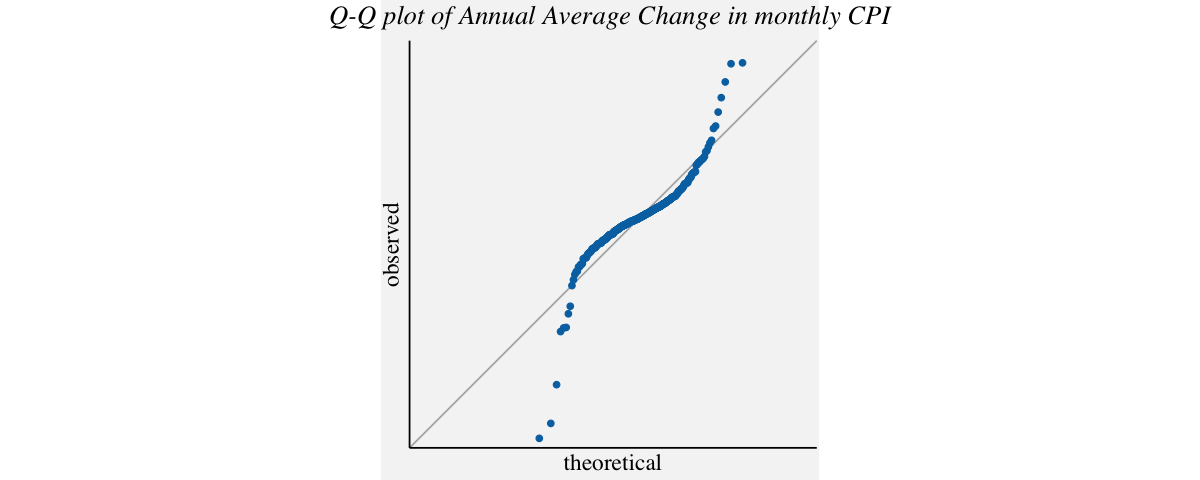

In [30]:
params <- as.list(MASS::fitdistr(cpi_annualavg$AnnualAvgChange,"normal")$estimate)

# Coordinates for the axis line segments 
df_segment <- data.frame(x = c(-19,-19), xend = c(19,-19),y = c(-19, -19),yend = c(-19,19))

# Q-Q plot using stat_qq() and geom_abline()
ggplot(cpi_annualavg, aes(sample = cpi_annualavg$AnnualAvgChange)) + 
  geom_abline(slope = 1, intercept = 0, color = "grey70") +
  stat_qq(dparams = params, color = "#0072B2") +
  geom_segment(
    data = df_segment,
    aes(x = x, xend = xend, y = y, yend = yend),
    size = 0.5, inherit.aes = FALSE) +
  scale_x_continuous(limits = c(-19, 19), 
                     expand = c(0, 0), 
                     breaks = 15*(5:10)) +
  scale_y_continuous(limits = c(-19,19), 
                     expand = c(0, 0), 
                     breaks = 10*(5:10), 
                     name = "observed") +
  coord_fixed(clip = "off") +
  theme_pprabhu() +
  ggtitle("Q-Q plot of Annual Average Change in monthly CPI ") + 
  theme(axis.line = element_blank(),plot.title=element_text(hjust = 0.5,face="italic"))

> #### Multiple Distributions in one plot 




> #### Boxplot

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”

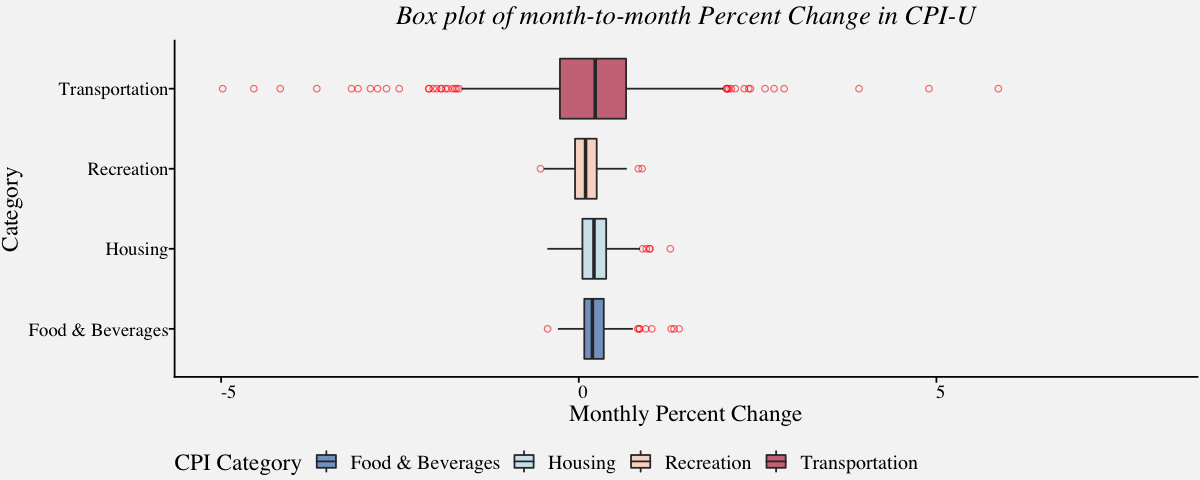

In [31]:
# month-to-month Percent Change in CPI-U for Food, Housing, Transport & Recreation
cpi_pct <- filter(cpi_pctchng,Category %in% c('Housing',
                                              'Transportation',
                                              'Recreation',
                                              'Food & Beverages'))


# Boxplot of carrier delays of largest air carriers in the Unites States
cpi_boxplot <-
ggplot(data=cpi_pct,
       aes(x=cpi_pct$Category,
           y=cpi_pct$PercentChange,
           fill=cpi_pct$Category)) +
       ylim(-5,8) +
       labs(fill="CPI Category") +
       geom_boxplot(outlier.colour="red",
                    outlier.shape=1,
                    alpha=0.6) +
       theme_pprabhu() + 
       ggtitle("Box plot of month-to-month Percent Change in CPI-U") +
       labs(x="Category",y="Monthly Percent Change") +
       scale_fill_manual(values = pprabhu_pal("div",reverse=TRUE)(4)) +
       coord_flip() +
       theme(plot.title=element_text(hjust=0.5,face="italic"),
             axis.text.x = element_text(angle=0))    

cpi_boxplot

> ##### Violin Plots

Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”

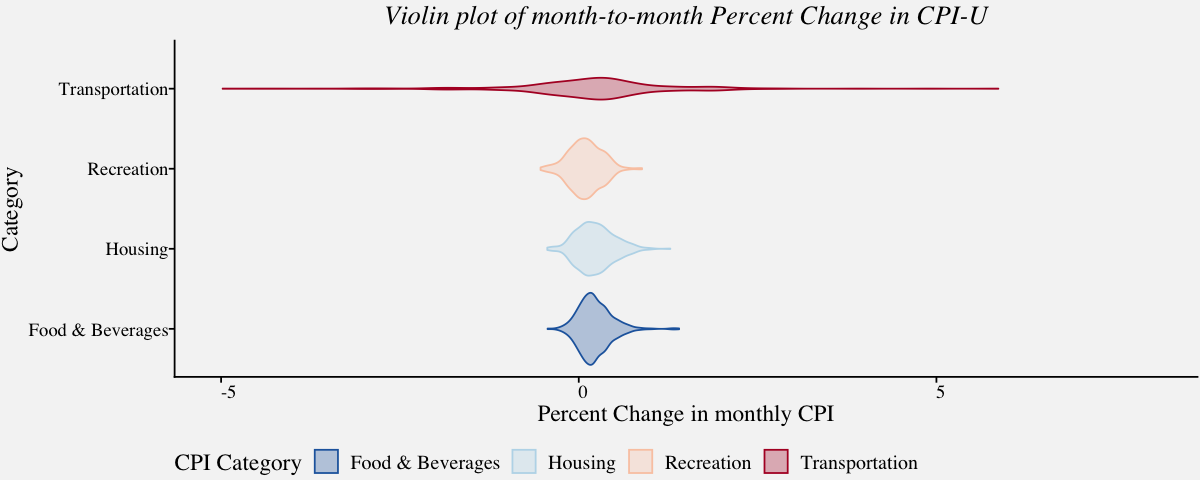

In [32]:
# Violin plot of carrier delays of largest air carriers in the Unites States
cpi_violinplot <-
ggplot(data=cpi_pct,
       aes(x=cpi_pct$Category,y=cpi_pct$PercentChange,color=cpi_pct$Category,fill =cpi_pct$Category)) +
       ylim(-5,8) +
       labs(color="CPI Category",fill="CPI Category") +
       geom_violin(alpha=0.3) +
       theme_pprabhu() + 
       ggtitle("Violin plot of month-to-month Percent Change in CPI-U") +
       labs(x="Category",y="Percent Change in monthly CPI") +
       scale_fill_manual(values = pprabhu_pal("div")(4)) +
       scale_color_manual(values = pprabhu_pal("div")(4)) +
       coord_flip() +
       theme(plot.title=element_text(hjust=0.5,face="italic"),
             axis.text.x = element_text(angle=0))    

cpi_violinplot

> ##### Strip Chart

Warning message:
“Removed 3 rows containing missing values (geom_point).”

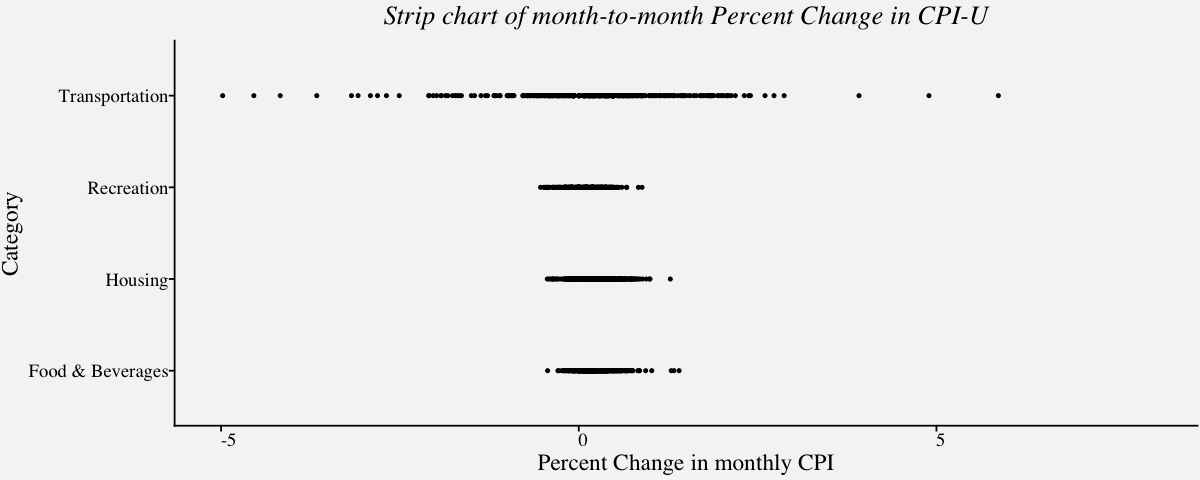

In [33]:

# Strip chart of carrier delays of largest air carriers in the Unites States
# Using geom_point()
cpi_stripchart <-
ggplot(data=cpi_pct,
       aes(cpi_pct$Category,cpi_pct$PercentChange)) +
       ylim(-5,8) +
       geom_point(size = 0.75) + 
       theme_pprabhu() +
       ggtitle("Strip chart of month-to-month Percent Change in CPI-U") +
       labs(x="Category",y="Percent Change in monthly CPI") +
       coord_flip() +
       theme(plot.title=element_text(hjust=0.5,face="italic"),
             axis.text.x = element_text(angle=0))   

cpi_stripchart

> ##### Jitter Plots

Warning message:
“Removed 3 rows containing missing values (geom_point).”

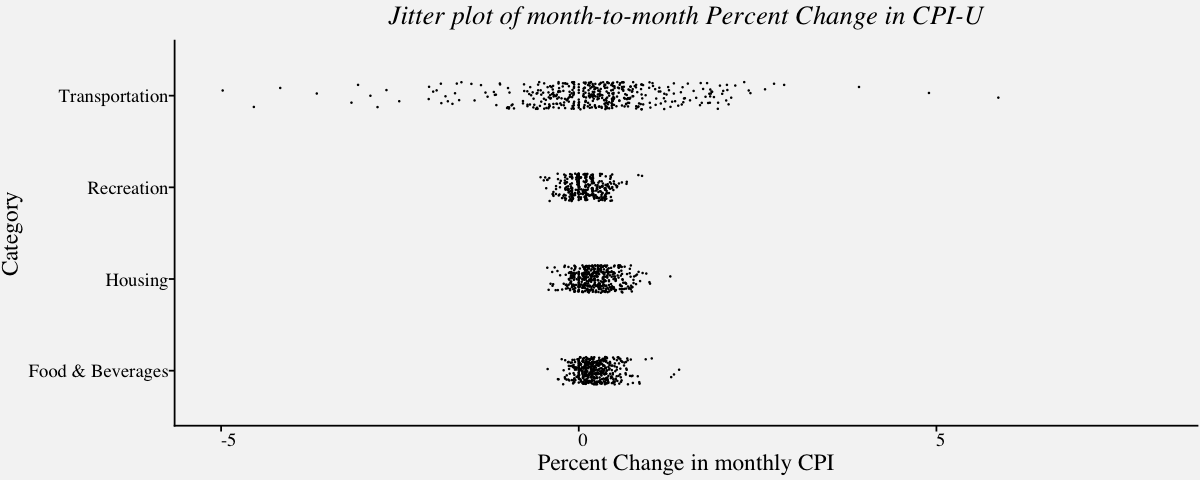

In [34]:
# Jitter plot(Strip chart with jitters) of carrier delays of largest air carriers in the Unites States
cpi_jitter <-
ggplot(data=cpi_pct,
       aes(cpi_pct$Category,cpi_pct$PercentChange)) +
       ylim(-5,8) +
       geom_point(position = position_jitter(width = .15, height = 0, seed = 320), size = 0.05) +
       theme_pprabhu() + 
       ggtitle("Jitter plot of month-to-month Percent Change in CPI-U") +
       labs(x="Category",y="Percent Change in monthly CPI") +
       coord_flip() +
       theme(plot.title=element_text(hjust=0.5,face="italic"),
             axis.text.x = element_text(angle=0))   

cpi_jitter

> #####  Sina plot

Warning message:
“Removed 19 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 19 rows containing non-finite values (stat_sina).”

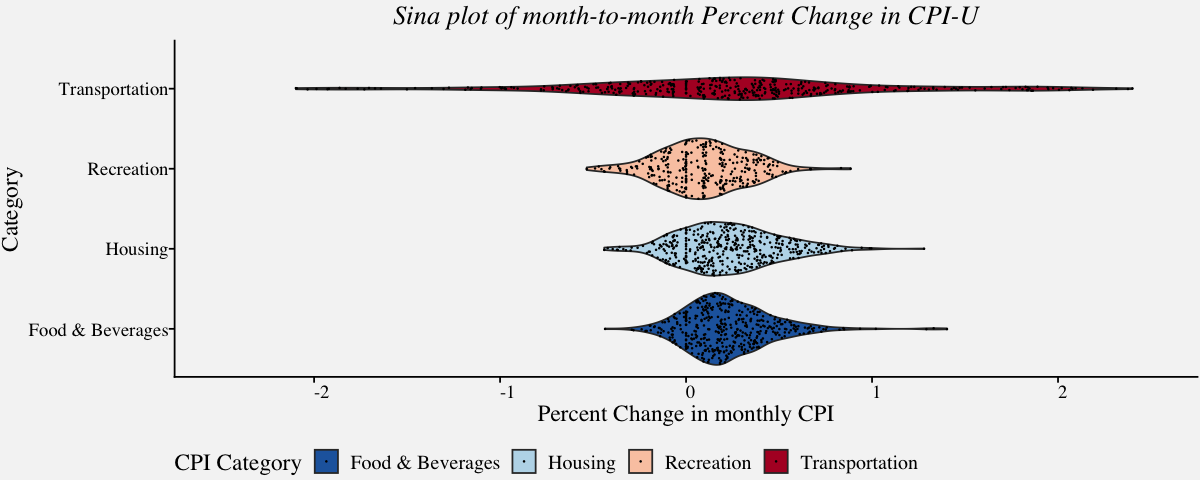

In [35]:

# Sina plot of carrier delays of largest air carriers in the Unites States
cpi_sina <-
ggplot(data=cpi_pct,
       aes(x=cpi_pct$Category,y=cpi_pct$PercentChange,fill=cpi_pct$Category)) +
       ylim(-2.5,2.5) +
       geom_violin() + 
       ggforce::geom_sina(size = 0.05) + 
       theme_pprabhu() +
       ggtitle("Sina plot of month-to-month Percent Change in CPI-U") +
       labs(x="Category",y="Percent Change in monthly CPI",fill="CPI Category") +
       scale_color_manual(values = pprabhu_pal("div")(4)) +
       scale_fill_manual(values = pprabhu_pal("div")(4)) +
       coord_flip() +
       theme(plot.title=element_text(hjust=0.5,face="italic"),
             axis.text.x = element_text(angle=0))  

cpi_sina

> ##### Ridgeline Plots

    Examples :
    Advantages :
    Disadvantages :
    Variations Available : "binline"
    
    # Trend comparison using Ridgeline plots
    # Task is to find a dataset with polarized data

Warning message:
“Removed 46 rows containing non-finite values (stat_density_ridges).”

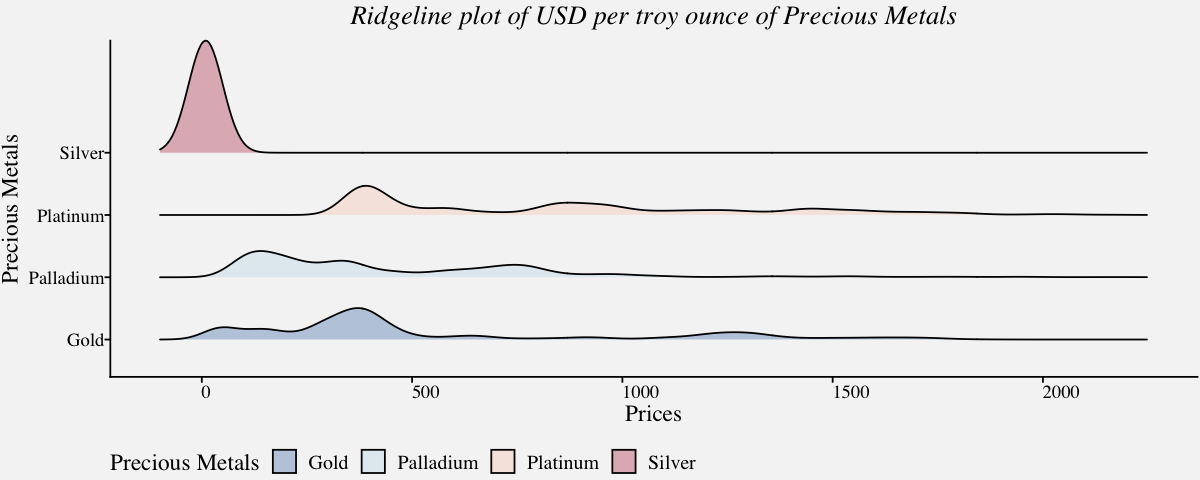

In [36]:
# Ridgeline plots to view price distribution of precious metals (1968-Present)
preciousmetals_ridgeline <-
ggplot(precious_metals, 
       aes(x=precious_metals$USD,
           y=precious_metals$Commodity,
           fill = precious_metals$Commodity)) +
geom_density_ridges(bandwidth=40,color="black",alpha=0.3) +
xlim(-100,2250) +
labs(fill="Precious Metals") +
labs(x="Prices",y="Precious Metals") +
coord_cartesian(clip = "off") +
scale_fill_manual(values = pprabhu_pal("div")(4)) +
scale_color_manual(values = pprabhu_pal("div")(4)) +
theme_pprabhu() +
ggtitle("Ridgeline plot of USD per troy ounce of Precious Metals") +
theme(plot.title = element_text(hjust=0.5,face="italic"),
      axis.text.x = element_text(angle=0))

preciousmetals_ridgeline

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
`stat_binline()` using `bins = 30`. Pick better value with `binwidth`.


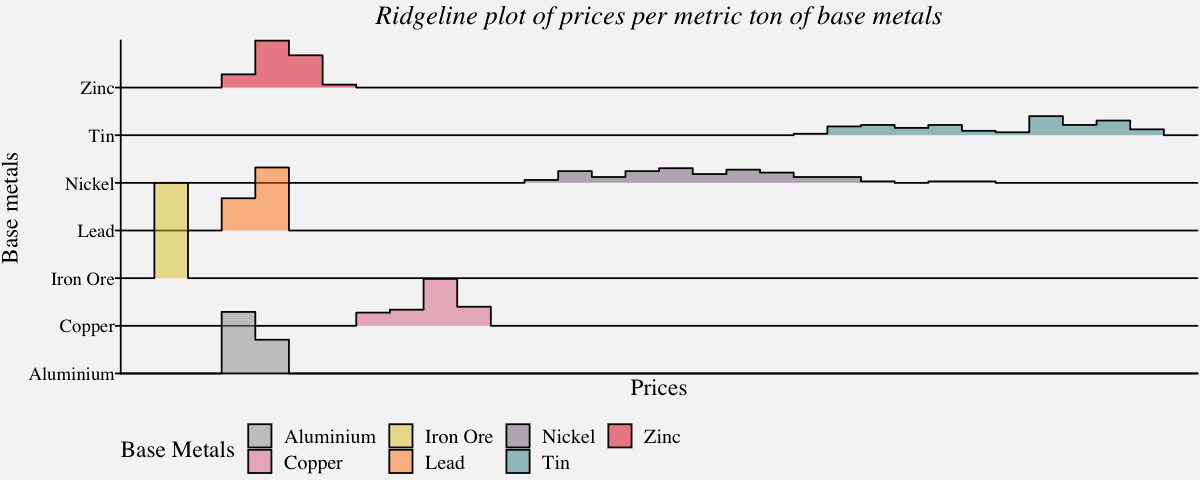

In [37]:
# Prices of various base metals (2014-Present)
basemetals_ridges <- filter(base_metals,Year>2014)

# Ridgeline plots to view price distribution of various base metals (2014-Present)
basemetals_ridgeline <-
ggplot(basemetals_ridges, 
       aes(x=basemetals_ridges$Value,
           y=basemetals_ridges$Commodity,
           fill = basemetals_ridges$Commodity)) +
geom_density_ridges(stat="binline",
                    scale=2,
                    color="black",
                    alpha=0.5) +
labs(fill="Base Metals") +
xlim(-5000,25000) +
labs(x="Prices",y="Base metals") +
theme_pprabhu() +
scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0)) +
scale_fill_manual(values = pprabhu_pal("qual")(7)) +
scale_color_manual(values = pprabhu_pal("qual")(7)) +
coord_cartesian(clip = "off") +
ggtitle("Ridgeline plot of prices per metric ton of base metals") +
theme(plot.title = element_text(hjust=0.5,face="italic"),
      axis.text.x = element_text(angle=0))

basemetals_ridgeline